In [ ]:



import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/imdb_top_1000.csv'
df = pd.read_csv(file_path)
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Məlumatların təmizlənməsi


In [ ]:
# 'Poster_Link' sütununu silirik (əgər varsa)
if "Poster_Link" in df.columns:
    df = df.drop("Poster_Link", axis=1)

# 'Not Available' olan illəri çıxardırıq
df = df[df["Released_Year"] != "Not Available"]


# Müddət sütunundakı " min" hissəsini çıxardırıq və ədədə çeviririk
df["Runtime"] = df["Runtime"].astype(str).str.replace(" min", "")
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")



# Boş sertifikatları "Unknown" ilə əvəz edirik
df["Certificate"] = df["Certificate"].fillna("Unknown")

# Meta skor üçün boşluqları orta dəyərlə əvəz edirik
df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].mean())

# Gəlir üçün boşluqları median dəyərlə doldururuq
df["Gross"] = df["Gross"].fillna(df["Gross"].median())

# Əsas sütunlarda boş sətrləri silirik
df = df.dropna(subset=["Released_Year", "Runtime", "IMDB_Rating"])
df["Gross"] = df["Gross"].astype(str).str.replace(",", "", regex=False)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")
df["Gross"] = df["Gross"].astype(int)


In [ ]:
# Показывать все строки
pd.set_option('display.max_rows', None)

# Показывать все столбцы
pd.set_option('display.max_columns', None)

# Показать весь DataFrame
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.00000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.00000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.00000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.00000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.00000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.00000,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
6,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.00000,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
7,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.00000,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
8,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.00000,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.00000,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


# yoxlama(netice)

In [ ]:

df.info()
df.head()
# Sütunların tipləri
print(df_clean.dtypes)

# Boş olan dəyərlərin sayı
print(df_clean.isna().sum())



<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    Int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: Int64(1), float64(3), int64(2), object(9)
memory usage: 125.9+ KB


NameError: name 'df_clean' is not defined

In [ ]:
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce").astype("Int64")

# EDA — İlkin Məlumat Analizi


# Rəqəmsal Sütunlar Arasında Korrelyasiya Matrisi

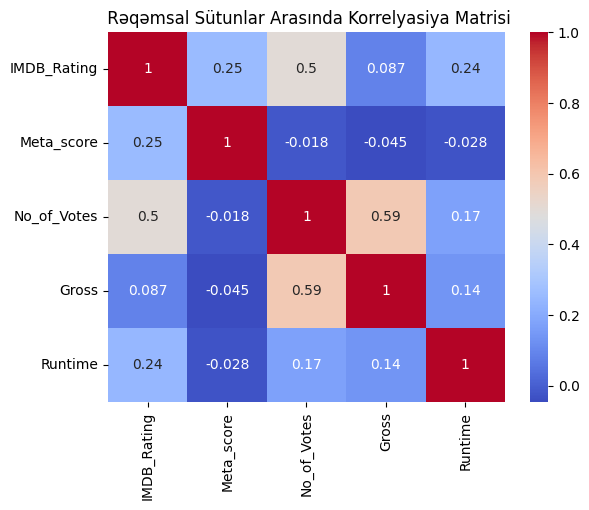

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df_clean[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Runtime"]].corr(),
    annot=True, cmap='coolwarm'
)
plt.title(" Rəqəmsal Sütunlar Arasında Korrelyasiya Matrisi")
plt.show()


# IMDb Reytinqlərinin Paylanması

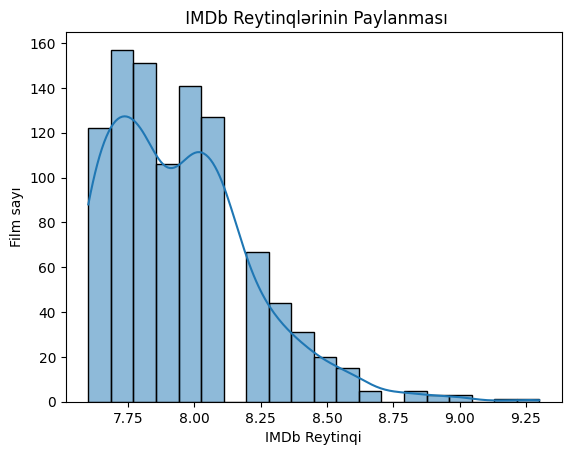

In [ ]:
sns.histplot(df_clean["IMDB_Rating"], bins=20, kde=True)
plt.title(" IMDb Reytinqlərinin Paylanması")
plt.xlabel("IMDb Reytinqi")
plt.ylabel("Film sayı")
plt.show()


# Ən Populyar 10 Janr

In [ ]:
import plotly.express as px
import pandas as pd

# Janrları parçalayırıq və ən çox rast gəlinən 10 janrı seçirik
top_genres = df_clean["Genre"].str.split(", ").explode().value_counts().head(10).reset_index()
top_genres.columns = ["Genre", "Count"]

# Interaktiv bar chart (rəngli və hover funksiyalı)
fig = px.bar(
    top_genres,
    x="Genre",
    y="Count",
    color="Count",
    color_continuous_scale="deep",  # Alternativlər: magma, viridis, plasma, turbo, cividis
    title="🎭 Ən Populyar 10 Janr"
)

# Qrafik parametrləri
fig.update_layout(
    template="plotly_white",
    title_font_size=20,
    xaxis_title="Janr",
    yaxis_title="Film sayı",
    xaxis_tickangle=-45
)

fig.show()



# 🎬 1. IMDb Reytinqlərinə görə Ən Yüksək 10 Film

In [ ]:
import plotly.express as px

top10_rating = df_clean.sort_values(by="IMDB_Rating", ascending=False).head(10)

fig = px.bar(
    top10_rating,
    x="IMDB_Rating",
    y="Series_Title",
    orientation="h",
    color="IMDB_Rating",
    color_continuous_scale="viridis",
    title="🌟 IMDb Reytinqinə görə TOP 10 Film",
    labels={"IMDB_Rating": "IMDb Reytinqi", "Series_Title": "Film"}
)

fig.update_layout(
    template="plotly_white",
    yaxis={"categoryorder": "total ascending"},
    title_font_size=20
)

fig.show()



# 🎬 Ən Çox Filmə Sahib 10 Rejissor

/tmp/ipython-input-25-1538661305.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




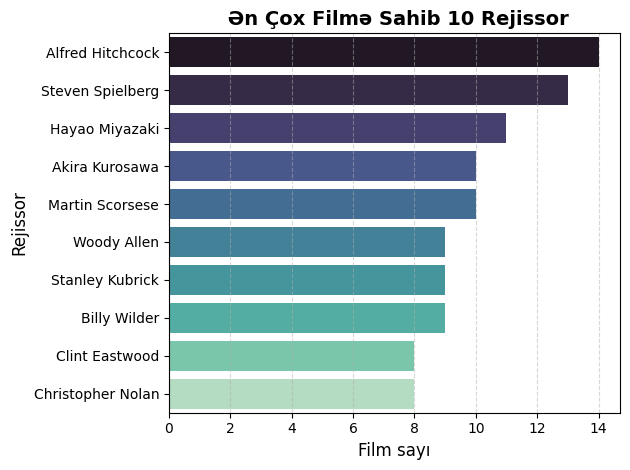

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rejissorların film sayı
top_directors = df_clean["Director"].value_counts().head(10)

# Rəng palitrası: "viridis", "mako", "rocket", "coolwarm" kimi modern seçimlər mümkündür
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    palette="mako"  # rəng palitrası burada dəyişdirilə bilər
)

plt.title(" Ən Çox Filmə Sahib 10 Rejissor", fontsize=14, fontweight='bold')
plt.xlabel("Film sayı", fontsize=12)
plt.ylabel("Rejissor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Ən yüksək IMDb Reytinqinə sahib aktyorlar (Star1)

/tmp/ipython-input-26-611418713.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




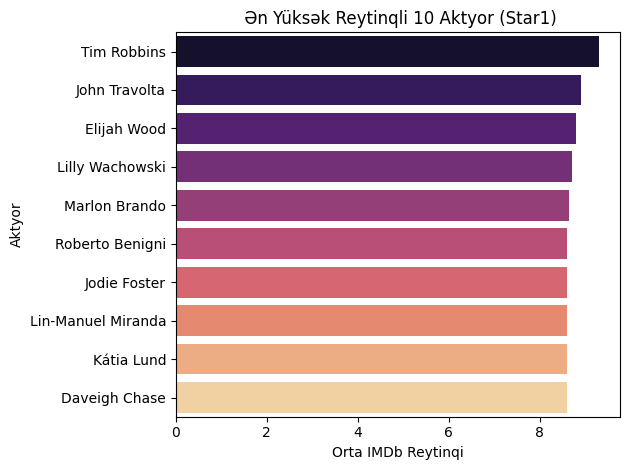

In [ ]:
top_actors_rating = df_clean.groupby("Star1")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_actors_rating.values, y=top_actors_rating.index, palette="magma")
plt.title(" Ən Yüksək Reytinqli 10 Aktyor (Star1)")
plt.xlabel("Orta IMDb Reytinqi")
plt.ylabel("Aktyor")
plt.tight_layout()
plt.show()

# İllərə görə film sayı

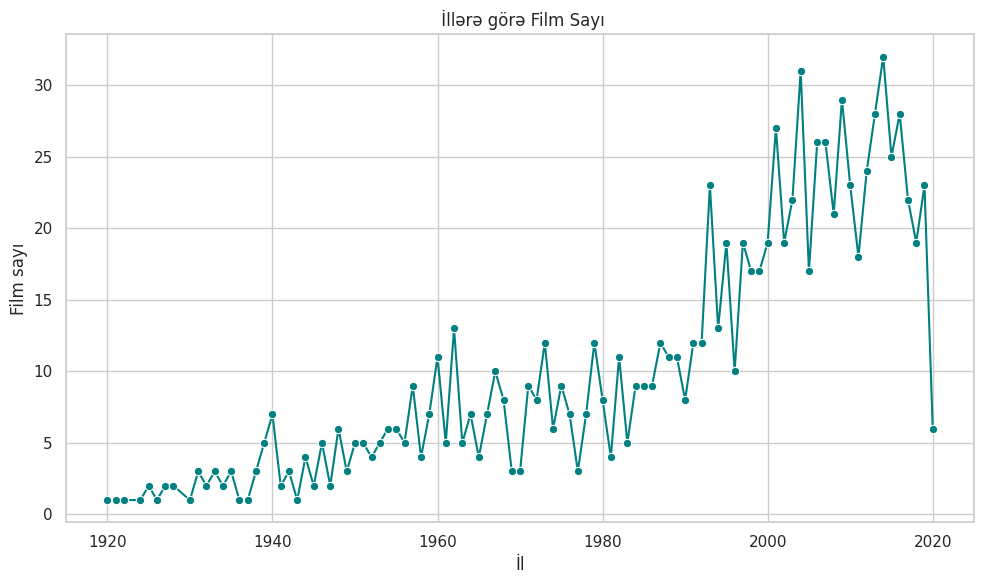

In [ ]:
year_counts = df_clean["Released_Year"].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="teal")
plt.title(" İllərə görə Film Sayı")
plt.xlabel("İl")
plt.ylabel("Film sayı")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ən yüksək gəlirə sahib 10 film

/tmp/ipython-input-27-1266620089.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




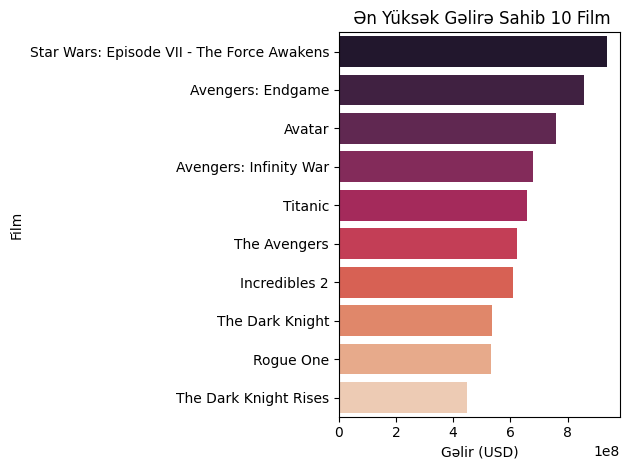

In [ ]:
top10_gross = df_clean.sort_values(by="Gross", ascending=False).head(10)
sns.barplot(x=top10_gross["Gross"], y=top10_gross["Series_Title"], palette="rocket")
plt.title(" Ən Yüksək Gəlirə Sahib 10 Film")
plt.xlabel("Gəlir (USD)")
plt.ylabel("Film")
plt.tight_layout()
plt.show()

# Janra görə orta gəlir (Gross)

/tmp/ipython-input-28-1462833539.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




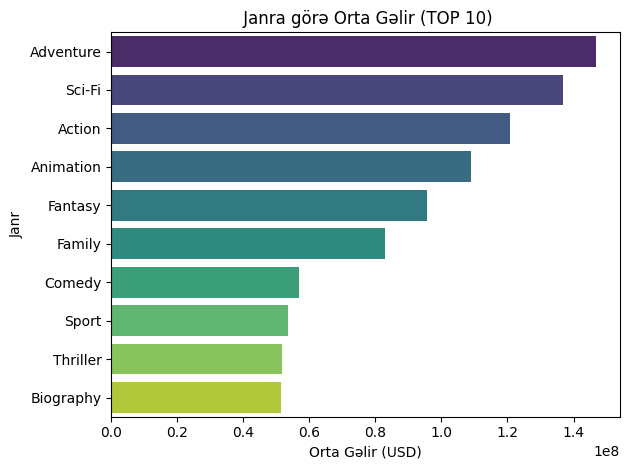

In [ ]:
genre_gross = df_clean.copy()
genre_gross["Genre"] = genre_gross["Genre"].str.split(", ")
genre_gross = genre_gross.explode("Genre")
genre_gross["Genre"] = genre_gross["Genre"].str.strip()
avg_gross_by_genre = genre_gross.groupby("Genre")["Gross"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, palette="viridis")
plt.title(" Janra görə Orta Gəlir (TOP 10)")
plt.xlabel("Orta Gəlir (USD)")
plt.ylabel("Janr")
plt.tight_layout()
plt.show()

zsx

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Faylı oxuyuruq
df = pd.read_csv("/content/imdb_top_1000.csv")

# Ən çox baş rolda çəkilən aktyorlar
top_actors_by_count = df["Star1"].value_counts().head(10)

# Vizual qururuq
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_actors_by_count.values,
    y=top_actors_by_count.index,
    palette="rocket"
)
plt.title("🎬 Ən Çox Baş Rol Oynamış 10 Aktyor (Star1)")
plt.xlabel("Film sayı")
plt.ylabel("Aktyor")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/imdb_top_1000.csv'